## FCN -  `detect()` Process 

We generate the inputs to `DetectTargetLayer` , to manipulate and modify the layer to procduce a modified `output_rois` 
containing false positives. 
This will be passed on the the heatmap layer, and through there will become the input to FCN.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys,os, pprint
pp = pprint.PrettyPrinter(indent=2, width=100)
print('Current working dir: ', os.getcwd())
if '..' not in sys.path:
    print("appending '..' to sys.path")
    sys.path.append('..')
    
import numpy as np
import mrcnn.utils     as utils
import mrcnn.visualize as visualize
from mrcnn.prep_notebook import build_fcn_evaluate_pipeline, get_evaluate_batch
# from mrcnn.prep_notebook import get_inference_batch, get_image_batch, get_training_batch
from mrcnn.visualize     import display_training_batch
from mrcnn.coco          import prep_coco_dataset
from mrcnn.datagen import data_gen_simulate

input_parms  =" --batch_size     1  "
input_parms +=" --mrcnn_logs_dir train_mrcnn_coco "
input_parms +=" --fcn_logs_dir   train_fcn8_subset " 
input_parms +=" --mrcnn_model    last "
input_parms +=" --fcn_model      last "
input_parms +=" --fcn_arch       fcn8 " 
input_parms +=" --coco_classes   78 79 80 81 82 44 46 47 48 49 50 51 34 35 36 37 38 39 40 41 42 43 10 11 13 14 15 "
input_parms +=" --sysout         screen "

# input_parms = " --epochs         2   --steps_in_epoch 32  --last_epoch 0 "
# input_parms +=" --lr 0.00001     --val_steps 8 " 
# input_parms +=" --opt            adam "
# input_parms +=" --fcn_layers     all " 
# input_parms +=" --new_log_folder    "
parser = utils.command_line_parser()
args = parser.parse_args(input_parms.split())


Current working dir:  E:\git_projs\MRCNN3\notebooks
appending '..' to sys.path


Using TensorFlow backend.


In [ ]:
# from mrcnn.prep_notebook import build_fcn_evaluate_pipeline

In [2]:
# del mrcnn_model, fcn_model
mrcnn_model, fcn_model = build_fcn_evaluate_pipeline(args = args,verbose = 0)


--> Execution started at: 12-07-2018 @ 19:10:30
    Tensorflow Version: 1.8.0   Keras Version : 2.2.0 

Arguments passed :
--------------------
batch_size                     1
coco_classes                   [78, 79, 80, 81, 82, 44, 46, 47, 48, 49, 50, 51, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 10, 11, 13, 14, 15]
epochs                         1
fcn_arch                       FCN8
fcn_layers                     fcn32+
fcn_logs_dir                   train_fcn8_subset
fcn_losses                     fcn_bce_loss
fcn_model                      last
last_epoch                     0
lr                             0.001
mrcnn_exclude_layers           None
mrcnn_logs_dir                 train_mrcnn_coco
mrcnn_model                    last
new_log_folder                 False
opt                            ADAGRAD
scale_factor                   4
steps_in_epoch                 1
sysout                         SCREEN
val_steps                      1


>>> Initialize Paths
 windows  Windows

P

    old_style_scores               :  shape: (?, 3)                KB.shape:(None, 3)             Keras Tensor: False
    alt_scores_1                   :  shape: (?, 3)                KB.shape:(None, 3)             Keras Tensor: False
    alt_scores_1_scattered         :  shape: (1, 81, 200, 3)       KB.shape:(1, 81, 200, 3)       Keras Tensor: False

       Normalize_scores() ------------------------------------------------------
         input shape      :  (1, 81, 200, 3)
         reduce_min shape :  (1, 81, 1, 3)
         reduce_max shape :  (1, 81, 1, 3)
             output shape :  (1, 81, 200, 3)

    alt_scores_1_norm(by_class)    :  shape: (1, 81, 200, 3)       KB.shape:(1, 81, 200, 3)       Keras Tensor: False
    alt_scores_1_norm(by_image)    :  shape: (?, 3)                KB.shape:(None, 3)             Keras Tensor: False

    Normalize heatmap within each class !-------------------------------------
    in_heatmap_norm :  (?, 81, 256, 256) Keras tensor  False
    normal

-----------------------------------------------
 Load Model with init parm: [ last ]
-----------------------------------------------
 ---> last
>>> load_weights() from : F:\models\train_fcn8_subset\fcn20181205T0000\fcn_0135.h5
    Weights file loaded: F:\models\train_fcn8_subset\fcn20181205T0000\fcn_0135.h5 
FCN  MODEL Load weight file COMPLETE 


In [ ]:
# mrcnn_model.config.display()

### Load dataset

In [3]:
dataset_test, test_generator = prep_coco_dataset(["train", 'val35k'], mrcnn_model.config, generator = True, shuffle = False, return_coco =True, load_coco_classes=args.coco_classes)
class_names = dataset_test.class_names 
####  Display number of loaded images and class names
print("Testing Dataset Image Count: {}".format(len(dataset_test.image_ids)))
print("Testing Dataset Class Count: {}".format(dataset_test.num_classes))

COCO loading annotations file F:\MLDatasets\coco2014\annotations/instances_train2014.json  into memory...
Done (t=20.79s)
creating index...
index created!
 load subset of classes:  [78, 79, 80, 81, 82, 44, 46, 47, 48, 49, 50, 51, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 10, 11, 13, 14, 15]
 image dir            :  F:\MLDatasets\coco2014\train2014
 json_path_dir        :  F:\MLDatasets\coco2014\annotations/instances_train2014.json
 number of images     :  40400
 image_ids[:10]       :  [262146, 524291, 9, 393227, 393230, 131087, 393241, 393242, 131099, 393251]
 image_ids[1000:1010] :  [396150, 265080, 396157, 2951, 396172, 134032, 134033, 527250, 2963, 2964]
COCO loading annotations file F:\MLDatasets\coco2014\annotations/instances_valminusminival2014.json  into memory...
Done (t=9.40s)
creating index...
index created!
 load subset of classes:  [78, 79, 80, 81, 82, 44, 46, 47, 48, 49, 50, 51, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 10, 11, 13, 14, 15]
 image dir            :  F:\MLDatase

## Display Images

### Get next image from generator and display 

In [ ]:
test_batch_x, test_batch_y = next(test_generator)
display_training_batch(dataset_test, test_batch_x)

### info about some images

In [ ]:
## 62642 (persons),   68539 (trucks) 36466 (surfers)  75040 (boat and persons)
## 36466 surfers. 5498 basketbal players, 27711,30531
## 5498 lots of motorcylces & persons - 
## Persons: #26026, #7719, 111864, 58240,  
## 35347 - laptops, keyboards and cat
## items = [59199 , 102868]
## 89243: Person, bicylce and traiffic lights
## 101623 (cake and forks), 41423 (elephant & people)
## 33477 Table, bowl, cup, sandwich, knife
## 26763 Table, chair, cup , bowl, bottle
## 49316 Table, book, backpack, many bottles
## 12902 Car , truck and traffic light tree
## 57327 person and horses
## 26026 -- mountain, skiers, skiboards 
##  7719 -- people, bottles, handbags
## 27711 -- persons and boats
## 18045 -- person     
## 36769 -- people in meeting room with a 'giraffe'detection?
##  8634 -- person
## 30531 -- tennis players 
##  8645 -- two people
## 24627 -- Pizza, bowl, cups
# IMAGE_LIST = [75040] 
# IMAGE_LIST = [89243]
# IMAGE_LIST = [33477]
# IMAGE_LIST = [29731]
# IMAGE_LIST = [26763]
# IMAGE_LIST = [89243]  ## 89243: Person, bicylce and traiffic lights
# IMAGE_LIST = [43168]   ## 43168 Multiple umbrella, chairs, beds

# IMAGE_LIST = [18388, 64305] # , 1507]
# IMAGE_LIST = [107639, 112710, 39775]
# IMAGE_LIST = [24627, 33758, 6749]
# IMAGE_LIST = [24627, 33758] # , 6749]

### Get images using a list of image ids

 Image_id    :  0  Reference:  http://cocodataset.org/#explore?id=262146 Coco Id: 262146
 Image meta [   0  640  480    3    0  128 1024  896    1    1]
 Class ids   :  (3,)    [ 1 31 25]
 Class Names :  ['person', 'skis', 'backpack']


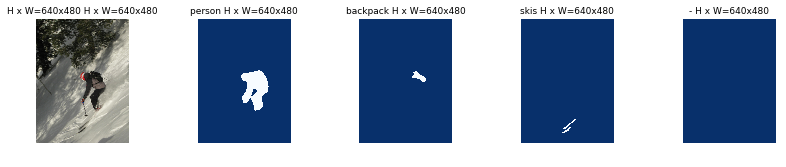

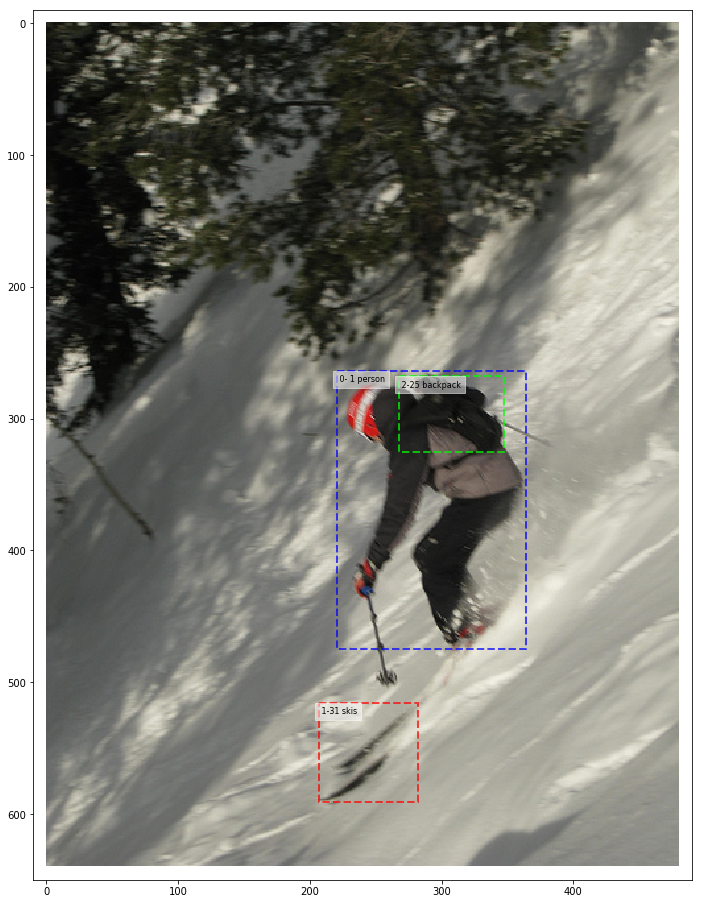

In [4]:
# from mrcnn.prep_notebook import get_training_batch, get_inference_batch, get_evaluate_batch


IMAGE_LIST = [2]
# image_batch = get_image_batch(dataset_test,IMAGE_LIST, display=True)
eval_batch = get_evaluate_batch(dataset_test, mrcnn_model.config, generator = test_generator, display = True)
# eval_batch = get_evaluate_batch(dataset_test, mrcnn_model.config, IMAGE_LIST, display = True)
# inference_batch, image_batch = get_inference_batch(dataset_test, mrcnn_model, IMAGE_LIST, display = True)

In [11]:
print(type(eval_batch), len(eval_batch))
for item in eval_batch :    
    if isinstance(item, list):
        print(' list ')
        for i in item:
            print('     ',i.shape) 
    else:
        print(type(item), item.shape)

<class 'list'> 5
 list 
      (640, 480, 3)
<class 'numpy.ndarray'> (1, 1024, 1024, 3)
<class 'numpy.ndarray'> (1, 89)
<class 'numpy.ndarray'> (1, 100)
<class 'numpy.ndarray'> (1, 100, 4)


### Other display functions

#### Display top masks for sample images

In [ ]:
# Load and display random samples
image_ids = np.random.choice(dataset_test.image_ids, 7)
for image_id in image_ids:
    image = dataset_test.load_image(image_id)
    mask, class_ids = dataset_test.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_test.class_names)

####  Dispaly a random image from dataset_test

In [ ]:
# Load random image and mask. ### 27711 persons and boats
image_id = np.random.choice(dataset_test.image_ids)
_ = batch_input = demo_image(dataset_test, mrcnn_model.config, image_id, masks = False)

#### Get an image and place into train_batch_x

In [ ]:
IMAGE_LIST= [30531]
batch_input = get_input_batch(dataset_test, mrcnn_model.config, 30531, masks = False)

## FCN detection using `fcn.detect()` - run `image_batch` Image List through model pipeline

In [13]:
# fcn_results = fcn_model.detect(mrcnn_model, image_batch)
mrcnn_results = mrcnn_model.evaluate(eval_batch, verbose =1)

Processing 1 images
image                    shape: (640, 480, 3)         min:    0.00000  max:  244.00000
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  131.10001
image_metas              shape: (1, 89)               min:    0.00000  max: 1024.00000
===>  call mrcnn_model.keras_model.predict()
 detections shape    : (8, 7)
(3, 7) (3,)
 Final fp_additons:  (3, 7)
detections + fp boxes: (11, 7)
final detections: sorted detections + fp boxes: (11, 7)
 mod_detections shape after adding false detections: (11, 7)
 mod_detections shape after padding : (200, 7)

   boxes_to_image_domain(): image_meta:  <class 'numpy.ndarray'> (89,)
 pr_scores_by_class shape: (81, 200, 24)
 molded_rois: (11, 4)
 final_rois: (11, 4)
 pr_scores_by_class shape: (81, 200, 24)
 pr_scores_by_image shape: (11, 24)


In [21]:
float_formatter = lambda x: "%9.4f" % x
np_format = {}
np_format['float']=float_formatter
np.set_printoptions(linewidth=195, precision=3, floatmode='fixed', threshold =10000, formatter = np_format)

print(len(mrcnn_results))
r = mrcnn_results[0]
print(r.keys())
for i in sorted(r.keys()):
     print('{:20s}    {}'.format(i , r[i].shape))
print('-----------------------------')        
print('  image_meta     : ', r["image_meta"].shape, r["image_meta"][:11] )
print('  rois           : ', r['rois'].shape)
# print(r['rois'])
print('  class ids      : ', r['class_ids'].shape, r['class_ids'])
print('  scores         : ', r['scores'].shape)
print('  pr_heatmap     : ', r['pr_hm'].shape) 
print('  detection_ind  : ', r['detection_ind'].shape, r['detection_ind'])
print('  pr_scores      : ', r['pr_scores'].shape)
# for i in r['pr_scores']:
#     print(i[:12])
#     print('\t\t\t', i[12:18] , i[18:])

1
dict_keys(['pr_scores', 'gt_class_ids', 'gt_bboxes', 'molded_image', 'class_ids', 'molded_rois', 'scores', 'image_meta', 'pr_hm', 'detections', 'image', 'pr_scores_by_class', 'detection_ind', 'pr_hm_scores', 'rois'])
class_ids               (11,)
detection_ind           (11,)
detections              (200, 7)
gt_bboxes               (100, 4)
gt_class_ids            (100,)
image                   (640, 480, 3)
image_meta              (89,)
molded_image            (1024, 1024, 3)
molded_rois             (11, 4)
pr_hm                   (256, 256, 81)
pr_hm_scores            (81, 200, 24)
pr_scores               (11, 24)
pr_scores_by_class      (81, 200, 24)
rois                    (11, 4)
scores                  (11,)
-----------------------------
  image_meta     :  (89,) [   0  640  480    3    0  128 1024  896    1    1    1]
  rois           :  (11, 4)
  class ids      :  (11,) [31  1  1 25 31 25 25 31 25 31 32]
  scores         :  (11,)
  pr_heatmap     :  (256, 256, 81)
  detection

In [27]:
# fcn_results = fcn_model.detect(mrcnn_model, image_batch)
fcn_results = fcn_model.evaluate(mrcnn_model, eval_batch, verbose =1)

call mrcnn.evaluate()
Processing 1 images
image                    shape: (640, 480, 3)         min:    0.00000  max:  244.00000
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  131.10001
image_metas              shape: (1, 89)               min:    0.00000  max: 1024.00000
===>  call mrcnn_model.keras_model.predict()
 detections shape    : (8, 7)
(3, 7) (3,)
 Final fp_additons:  (3, 7)
detections + fp boxes: (11, 7)
final detections: sorted detections + fp boxes: (11, 7)
 mod_detections shape after adding false detections: (11, 7)
 mod_detections shape after padding : (200, 7)

   boxes_to_image_domain(): image_meta:  <class 'numpy.ndarray'> (89,)
 pr_scores_by_class shape: (81, 200, 24)
 molded_rois: (11, 4)
 final_rois: (11, 4)
 pr_scores_by_class shape: (81, 200, 24)
 pr_scores_by_image shape: (11, 24)
===>   return from  MRCNN evaluate() :  1

 output  0    ['class_ids', 'detection_ind', 'detections', 'gt_bboxes', 'gt_class_ids', 'image', 'image_meta', 

In [ ]:
np.set_printoptions(linewidth=180,precision=4,threshold=10000, suppress = True)
print(len(fcn_results))
r = fcn_results[0]
print(r.keys())
# for i in r.keys():
#     print(i , r[i].shape)
# print('  image          : ', r["image"].shape )
# print('  image_meta     : ', r["image_meta"].shape, r["image_meta"][:11] )
# print('  rois           : ', r['rois'].shape)
# print(r['rois'])
# print('  class ids      : ', r['class_ids'].shape, r['class_ids'])
# print('  scores         : ', r['mrcnn_scores'].shape)
# print('  pr_heatmap     : ', r['pr_hm'].shape)
print('  fcn_hm         : ', r['fcn_hm'].shape)
print('  fcn_sm         : ', r['fcn_sm'].shape)
# print('  pr_scores      : ', r['pr_scores'].shape)
print('  pr_scores  : ')
print(r['pr_scores'])
print('  fcn_scores:',r['fcn_scores'].shape)
print('  fcn_scores  : ')
print(r['fcn_scores'])
# 
# print('  pr_scores_by_class:',r['pr_scores_by_class'].shape)
# print(r['pr_scores_by_class'][ r['class_ids'],:10])
# print('  fcn_scores_by_class:',r['fcn_scores_by_class'].shape)
# print(r['fcn_scores_by_class'][ r['class_ids'],:10])



## Run `inference_batch` through models using `run_inference_pipeline()`

### Run `inference_batch` through mrcnn modeI 

In [ ]:
from mrcnn.callbacks import get_layer_output_1
mrcnn_output = get_layer_output_1(mrcnn_model.keras_model, inference_batch, [1,2,3], 1, verbose = True)

### Run Image List through pipeline `run_inference_pipeline()`

In [ ]:
# mrcnn_model.layer_info()
# fcn_model.layer_info()
# # IMAGE_LIST = [18388, 64305, 1507]
# # IMAGE_LIST = [24627, 33758] # , 6749]
# IMAGE_LIST = [18388, 64305] #1507]
# outputs = run_inference_pipeline(mrcnn_model, fcn_model, dataset_test, IMAGE_LIST, verbose = True)

### Run Image List through pipeline `run_training_pipeline()`

In [ ]:
mrcnn_model.layer_info()
fcn_model.layer_info()
# IMAGE_LIST = [18388, 64305, 1507]
IMAGE_LIST = [24627, 33758] # , 6749]
outputs = run_training_pipeline(mrcnn_model, fcn_model, dataset_test, IMAGE_LIST)

###  Print some model information 

In [ ]:
float_formatter = lambda x: "%10.4f" % x
np_format = {}
np_format['float']=float_formatter
np.set_printoptions(linewidth=150, precision=3, floatmode='fixed', threshold =10000, formatter = np_format)   

In [ ]:
# results = mrcnn_model.detect([image], verbose=1)
# r = results[0]
print('  Length of outputs:', len(outputs))
print(outputs.keys())
for i in outputs.keys():
    print(i)
    shp = [str(j.shape) for j in outputs[i]]
    print(shp)
        
# print('  Length of r:', len(r))
# print('  rois       : ', r['rois'])
# print('  class ids  : ', r['class_ids'])
# print('  class names: ', dataset_test.class_names)
# print('  scores     : ', r['scores'])

In [ ]:
bbox_ixs = np.arange(20,26)
print(bbox_ixs)
# print(r['scores'][bbox_ixs])
visualize.display_instances(image, r['rois'][bbox_ixs], r['class_ids'][bbox_ixs], 
                            dataset_test.class_names, r['scores'][bbox_ixs], ax=visualize.get_ax(size=12))

#### Push Data thru model using get_layer_output()

In [ ]:
# model_output = get_layer_output_2(model.keras_model, train_batch_x, 1)
from mrcnn.callbacks import get_layer_output_1
model_output = get_layer_output_1(mrcnn_model.keras_model, test_batch_x, [0,1,2,3,4,5], 1, verbose = True)

### Display output from model

#### Display input_data

In [ ]:
# del input_image, input_image_meta, input_gt_class_ids, input_gt_bboxes #, input_gt_bboxes_norm
input_image      =  test_batch_x[0]
input_image_meta =  test_batch_x[1]

print(input_image.shape)
h, w = input_image.shape[1], input_image.shape[2]      #  tf.shape(input_image)[1], tf.shape(input_image)[2]
print('height/width', h,w)
print(' Input image shape is    :', input_image.shape)
print(' input_image_meta        :', input_image_meta)

# input_gt_bboxes_norm = input_gt_bboxes / [h,w,h,w]
# input_normlzd_gt_bboxes = tf.identity(input_gt_bboxes / [h,w,h,w])

#### Display Output Data

In [ ]:
print(len(model_output))
# del mrcnn_detection, rpn_roi_proposals, mrcnn_class, mrcnn_bbox
mrcnn_detection           = model_output[0]          # layer:  0   shape: (1, 100, 6)
rpn_roi_proposals         = model_output[1]          # layer:  1   shape: (1, 1000, 4)
mrcnn_class               = model_output[2]          # layer:  2   shape: (1, 1000, 81)
mrcnn_bbox                = model_output[3]          # layer:  3   shape: (1, 1000, 81, 4)
# pred_heatmap_norm         = model_output[4]          # layer:  4   shape: (1, 256, 256, 81)
# pred_heatmap_scores       = model_output[5]          # layer:  5   shape: (1, 81, 100, 11)
# print(type(model_output[4]))
# print(type(output_rois))
for i in model_output:
    print( i.shape)

#### mrcnn_class

In [ ]:
print(mrcnn_bbox[0,:2].shape) 
print('mrcnn_class shape:', mrcnn_class.shape)
print('mrcnn_bbox shape :', mrcnn_bbox.shape)
pred_scores  = np.max(mrcnn_class,axis = -1)
pred_classes = np.argmax(mrcnn_class,axis = -1)
# pred_classes_2 = np.take(out_mrcnn_bbox, pred_classes, axis = 2)  
print(pred_classes.shape)
print(pred_classes[0])

# print(mrcnn_bbox[0,0])

# pred_bboxes  = mrcnn_bbox[:, pred_classes]
# print('pred_scores shape:', pred_scores.shape)
# print('pred_classes shape:', pred_classes.shape)
# print('pred_bboxes shape:', pred_scores.shape)
# print(mrcnn_bbox.shape)
# print(pred_bboxes.shape)
# print(pred_bboxes[0,:10])


# print(' pred_scores \n',pred_scores)
# print(' pred_classes \n', pred_classes)
# for cls,score in zip(pred_classes,pred_scores):
#     print(' {:3d} {:.<20s} {:4f} '.format(cls, class_names[cls],score))


#### `rpn_roi_proposals`

In [ ]:
# print(input_gt_boxes.shape, input_image.shape)
print('output_rois',rpn_roi_proposals.shape, 'deltas ', mrcnn_bbox.shape, 'class_ids ', mrcnn_class.shape)

print(rpn_roi_proposals[0,:20])
print(rpn_roi_proposals[0,:20]*[h,w,h,w])
# print(input_gt_class_ids)
# print(input_normlzd_gt_bboxes)
# print(input_gt_bboxes_norm.shape)
# print(rpn_roi_proposals.shape)

## simulation of fcn model `Detect()` routine

In [ ]:
print(outputs.keys())

In [ ]:
# print(fcn_scores[0,:10])
# print(detections[0,:10])
IMAGE_LIST = [18388, 64305] # , 1507]
# IMAGE_LIST = [107639, 112710, 39775]
image_batch = get_image_batch(dataset_test, IMAGE_LIST, display = True)

####  Prepare images to pass to model prediction pipeline

In [ ]:
from mrcnn.utils import log
images = outputs['image_batch']
verbose = True
self = mrcnn_model

##-------------------------------------------------------------------------------------        
#     def detect(self, images, verbose=0):
'''
Runs the detection pipeline.

images:         List of images, potentially of different sizes.

Returns a list of dicts, one dict per image. The dict contains:

rois:           [N, (y1, x1, y2, x2)] detection bounding boxes
class_ids:      [N] int class IDs
scores:         [N] float probability scores for the class IDs
masks:          [H, W, N] instance binary masks
'''

# assert self.mode   == "inference", "Create model in inference mode."
assert len(images) == self.config.BATCH_SIZE, "len(images) must be equal to BATCH_SIZE"

if verbose:
    log("Processing {} images".format(len(images)))
    for image in images:
        log("image", image)

# Mold inputs to format expected by the neural network
molded_images, image_metas, windows = self.mold_inputs(images)
if verbose:
    log("molded_images", molded_images)
    log("image_metas"  , image_metas)

####  Run predcitions pipeline

In [ ]:
## Run object detection pipeline

print('call mrcnn predict()')
mrcnn_detections, rpn_roi_proposals, mrcnn_class, mrcnn_bbox, pr_hm, pr_hm_scores =  \
          mrcnn_model.keras_model.predict([molded_images, image_metas], verbose=0)

print('    return from  mrcnn_predict()')
print('    Length of detections          : ', len(mrcnn_detections), mrcnn_detections.shape)
# print('    detections \n', detections)
print('    Length of rpn_roi_proposals   : ', len(rpn_roi_proposals), rpn_roi_proposals.shape)
# print('    Length of rpn_class         : ', len(rpn_class  ))
# print('    Length of rpn_bbox          : ', len(rpn_bbox   ))
print('    Length of mrcnn_class         : ', len(mrcnn_class), mrcnn_class.shape)
print('    Length of mrcnn_bbox          : ', len(mrcnn_bbox ), mrcnn_bbox.shape)
print('    Length of pr_hm               : ', len(pr_hm), pr_hm.shape)
print('    Length of pr_hm_scores        : ', len(pr_hm_scores), pr_hm_scores.shape)


print('call fcn predict()')
fcn_hm, fcn_sm, fcn_hm_scores = fcn_model.keras_model.predict([pr_hm, pr_hm_scores], verbose = 1)

## Run object detection pipeline 
print('    return from  predict()')
print('    Length of fcn_heatmaps : ', len(fcn_hm), fcn_hm.shape)
print('    Length of fcn_softmax  : ', len(fcn_sm), fcn_sm.shape)
print('    Length of fcn_hm_scores: ', len(fcn_hm_scores), fcn_hm_scores.shape)
 
# Process detections

#### After `predict()` functions  -  call `unmold_detections()` - Prepare output of model prediction for display

In [ ]:
np.set_printoptions(linewidth=180,precision=3,threshold=10000, suppress = True)
fcn_results = []

for i, image in enumerate(images):
    print(' Unmold image ', i, 'image_shape: ', image.shape,  '  windows[]:', windows[i])
    mrcnn_rois, mrcnn_class_ids, mrcnn_scores = mrcnn_model.unmold_detections(mrcnn_detections[i], image.shape, windows[i])    
    print(pr_hm_scores[i].shape)
    print(fcn_hm_scores[i].shape)
    print('mrcnn_class_ids: ', mrcnn_class_ids)
    ## pr_hm_scores is by image/class/bounding box
    ## fcn_hm_scores is by image/class/bounding box
    
    ## reshape pr_hm_scores from per_class to per_image tensor
    ## Convert pr_scores_by_image bboxes from NN coordinates to image coordinates
    #     pr_scores_by_image = utils.byclass_to_byimage_np(pr_hm_scores[i], 6)
    #     print(' pr_scores_by_class shape',pr_scores_by_image.shape)
    #     pr_boxes_adj = utils.boxes_to_image_domain(pr_scores_by_image[:,:4],image_metas[i])
    #     pr_scores_by_image = np.hstack((pr_boxes_adj, pr_scores_by_image[:,4:]))
    #     print(' pr_boxes_adj')
    #     print(pr_boxes_adj)
    #     print(' pr_scores_by_image')
    #     print(pr_scores_by_image)

    ## pr_hm_scores is by class  
    ## Convert pr_hm_scores bboxes from NN coordinates to image coordinates
    pr_boxes_adj = utils.boxes_to_image_domain(pr_hm_scores[i,:,:,:4],image_metas[i])
    pr_scores_by_class= np.dstack((pr_boxes_adj, pr_hm_scores[i,:,:,4:]))
    print(' fcn_scores_by_class shape', fcn_scores_by_class.shape)
    pr_scores_by_image = utils.byclass_to_byimage_np(pr_scores_by_class, 6)

    #     print(' pr_boxes_adj_2')
#     print(pr_boxes_adj_2[mrcnn_class_ids, :10])
#     print(' pr_scores_by_class')
#     print(pr_scores_by_class[mrcnn_class_ids, :10])

    ## fcn_hm_scores is by class  
    ## Convert pr_hm_scores bboxes from NN coordinates to image coordinates
    fcn_boxes_adj = utils.boxes_to_image_domain(fcn_hm_scores[i,:,:,:4],image_metas[i])
    fcn_scores_by_class= np.dstack((pr_boxes_adj, fcn_hm_scores[i,:,:,4:]))
    print(' fcn_scores_by_class shape', fcn_scores_by_class.shape)
    fcn_scores_by_image = utils.byclass_to_byimage_np(fcn_scores_by_class, 6)
#     print(' pr_boxes_adj')
#     print(pr_boxes_adj[mrcnn_class_ids, :10])
#     print(' fcn_scores_by_class')
#     print(fcn_scores_by_class[mrcnn_class_ids, :10])  

#     fcn_scores_adj,fcn_rois, fcn_class_ids, mrcnn_scores_norm, fcn_scores = fcn_unmold_detections(fcn_model, fcn_hm_scores[i], image.shape, windows[i]) 
#     print(fcn_scores_adj.shape, fcn_rois.shape, fcn_class_ids.shape, mrcnn_scores_norm.shape, fcn_scores.shape)
    
    fcn_results.append({
        "image"        : images[i],
        "image_meta"   : image_metas[i],
        "rois"         : mrcnn_rois,
        "class_ids"    : mrcnn_class_ids,
        "mrcnn_scores" : mrcnn_scores, 
        "pr_scores"    : pr_scores_by_image,
        "pr_scores_by_class"    : pr_scores_by_class,
        "fcn_scores"   : fcn_scores_by_image,
        "fcn_scores_by_class"   : fcn_scores_by_class,

        "pr_hm"        : pr_hm[i],
        "fcn_hm"       : fcn_hm[i],
        "fcn_sm"       : fcn_sm[i]
    })
    
    # return results     

####  Display results from `detect()`

In [ ]:
np.set_printoptions(linewidth=180,precision=4,threshold=10000, suppress = True)
print(len(fcn_results))
r = fcn_results[1]
print(r.keys())
# for i in r.keys():
#     print(i , r[i].shape)
print('  image          : ', r["image"].shape )
print('  image_meta     : ', r["image_meta"].shape, r["image_meta"][:11] )
print('  rois           : ', r['rois'].shape)
print(r['rois'])
print('  class ids      : ', r['class_ids'].shape, r['class_ids'])
print('  scores         : ', r['mrcnn_scores'].shape)
print('  pr_heatmap     : ', r['pr_hm'].shape)
print('  fcn_hm         : ', r['fcn_hm'].shape)
print('  fcn_sm         : ', r['fcn_sm'].shape)
print('  pr_scores      : ', r['pr_scores'].shape)
print('  pr_scores  : ')
print(r['pr_scores'])
print('  fcn_scores:',r['fcn_scores'].shape)
print('  fcn_scores  : ')
print(r['fcn_scores'])
# 
# print('  pr_scores_by_class:',r['pr_scores_by_class'].shape)
# print(r['pr_scores_by_class'][ r['class_ids'],:10])
# print('  fcn_scores_by_class:',r['fcn_scores_by_class'].shape)
# print(r['fcn_scores_by_class'][ r['class_ids'],:10])



## Display results from `detect()`

In [ ]:
img_idx = 0
r = fcn_results[img_idx]
visualize.display_instances_from_prscores(image_batch[img_idx], r['fcn_scores'], coco_class_names, score_range=(0.0, 0.72))

In [ ]:
# from mrcnn.visualize import display_heatmaps_mrcnn
# # np.unique(r['class_ids'])
# display_heatmaps_mrcnn([molded_images, image_metas], [r['pr_hm'], r['pr_scores_by_class']], 0, class_ids = r['class_ids'], 
#                             class_names = coco_class_names, config = mrcnn_model.config)


### Compare mrcnn predcited and FCN generated heatmaps from inference process

In [ ]:
class_ids = np.arange(20)
visualize.inference_heatmaps_compare(fcn_results, img_idx, class_ids = None, class_names=coco_class_names, hm = 'hm', config = mrcnn_model.config,scaling = 'each')

In [ ]:
img_id = 0
r = fcn_results[img_id]
pr_class_ids = np.unique(r['class_ids'])
fig = visualize.plot_2d_heatmap(r['fcn_hm'], r['fcn_scores_by_class'], img_id, pr_class_ids, columns = 3, num_bboxes = 0,
                          class_names = coco_class_names, scale = 4, scaling = 'none')

####  3D comparative display `pred_heatmap` / `fcn_heatmap` 

In [ ]:
img_id = 0
r = fcn_results[img_id]
print(r['pr_scores_by_class'].ndim)
# print('Image id: ',image_id, ' Coco ID: ', dataset_train.image_info[image_id]['id'])
pr_class_ids = np.unique(r['pr_scores_by_class'][:,:,4]).astype(int).tolist()
print('Image : {}  Predicted    ClassIds: {}'.format(img_id, pr_class_ids))

visualize.plot_3d_heatmap_compare(r['pr_hm'], r['fcn_hm'], 0, class_ids = pr_class_ids, 
                            class_names = coco_class_names, size=(8,8), zlim = 'all' , scaling = 'none')    